# Table of Contents

### 1. [Introduction](#Markov_Chain)
### 2. [Dataset](#dataset)
#### 2.1 [Wordcloud](#word-cloud)
### 3. [Markov Model](#markov-model)

<hr>

## <a id='Markov_Chain'>1. Introduction</a>

> Markov Chain is a stochastic model in which the probability of an event occuring depends only upon preceding event. The history of events do not matter when deciding the probabilities of next event. This is called Markov Property and the sequence of events that follow this property are called Markov Chain.

> The probability of jumping from an event to next one are modeled through transitional probabilities. Below is the formula to calculate transitional probabililty given event $x_n$ has happened.

> $Transitional Probability = P(X_{n+1} = x_{n+1} | X_n = x_n)$

> In this notebook, we will generate text using Markov Chain model. The dataset will be used from Kaggle.

## <a id='dataset'>2. Dataset</a>

> The dataset (corpus) for this project is taken from the public dataset avaialble on Kaggle. Here is the link to the dataset https://www.kaggle.com/idevji1/sherlock-holmes-stories
Below is the preview of the text.

In [29]:
demo_text_list = open("./archive/sherlock/cree.txt").readlines()
demo_text = ''.join(demo_text_list)
print(demo_text[:1000])





                        THE ADVENTURE OF THE CREEPING MAN

                               Arthur Conan Doyle



     Mr. Sherlock Holmes was always of opinion that I should publish the
     singular facts connected with Professor Presbury, if only to dispel
     once for all the ugly rumours which some twenty years ago agitated
     the university and were echoed in the learned societies of London.
     There were, however, certain obstacles in the way, and the true
     history of this curious case remained entombed in the tin box which
     contains so many records of my friend's adventures. Now we have at
     last obtained permission to ventilate the facts which formed one of
     the very last cases handled by Holmes before his retirement from
     practice. Even now a certain reticence and discretion have to be
     observed in laying the matter before the public.

     It was one Sunday evening early in September of the year 1903 that I
     received one of Holmes's laconic 

### <a id='word-cloud'>2.1 Wordcloud</a>

> We will plot wordclouds of some sample files. This will give us a little idea of most common words used.

In [91]:
# import libraries
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
import os
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sandi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

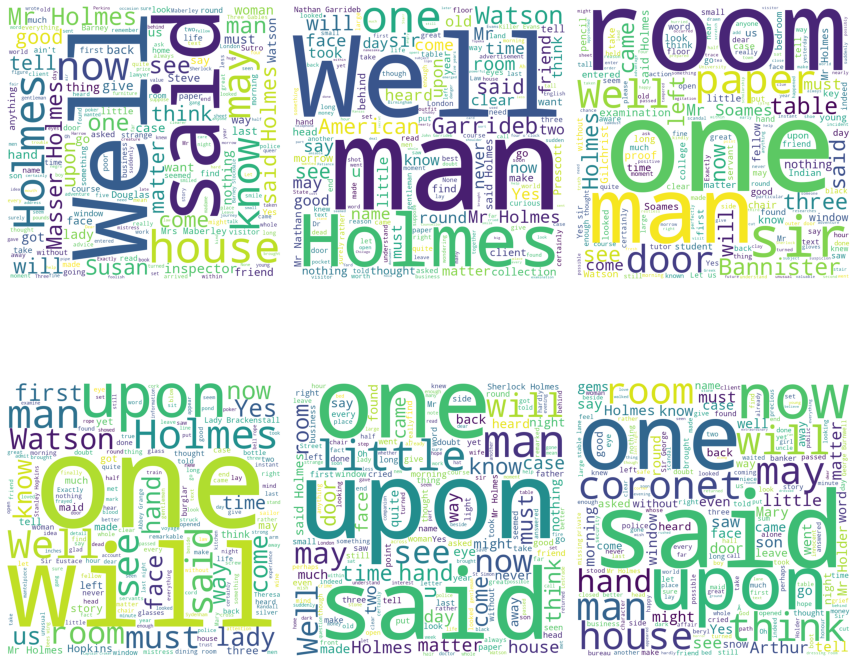

In [82]:
# plot wordcloud in subplots
txt_files = os.listdir("./archive/sherlock")

def plot_wordcloud(text_file, path = './archive/sherlock/'):
    text_list = open(os.path.join(path, text_file)).readlines()
    corpus = "".join(text_list)
    # plot wordcloud
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(corpus)
    return wordcloud

# plot the WordCloud image  
fig = plt.figure(figsize=(12, 12), facecolor = None)
plt.subplot(2, 3, 1)
wordcloud = plot_wordcloud(txt_files[0])
plt.imshow(wordcloud)
plt.axis("off")

plt.subplot(2, 3, 2)
wordcloud = plot_wordcloud(txt_files[1])
plt.imshow(wordcloud)
plt.axis("off")

plt.subplot(2, 3, 3)
wordcloud = plot_wordcloud(txt_files[2])
plt.imshow(wordcloud)
plt.axis("off")

plt.subplot(2, 3, 4)
wordcloud = plot_wordcloud(txt_files[3])
plt.imshow(wordcloud)
plt.axis("off")

plt.subplot(2, 3, 5)
wordcloud = plot_wordcloud(txt_files[4])
plt.imshow(wordcloud)
plt.axis("off")

plt.subplot(2, 3, 6)
wordcloud = plot_wordcloud(txt_files[5])
plt.imshow(wordcloud)
plt.axis("off")

plt.tight_layout()
plt.show()

## <a id='markov-model'>3. Markov Model</a>

In [86]:
# Combine all text files

def combine_txt_files(text_files, path = './archive/sherlock/'):
    corpus = []
    for file in text_files:
        with open(os.path.join(path, file)) as f:
            for line in f:
                line = line.strip()
                if line != '':
                    corpus.append(line)
    return corpus
        
txt_files = os.listdir("./archive/sherlock")
all_text = combine_txt_files(txt_files)
print('Number of Lines:', len(all_text))

Number of Lines: 215663


In [94]:
# Tokenizing text

def tokenize_text(text):
    tokenized_text = []
    for line in text:
        tokens = word_tokenize(line)
        tokenized_text.extend([w for w in tokens if w.isalpha()])
    return tokenized_text

tokenized_text = tokenize_text(all_text)
print("number of words:", len(tokenized_text))

number of words: 2323908


In [ ]:
# Markov Model



In [9]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show/ Hide Code"></form>''')

<footer id="footer" style="float:left; color:#999; background:#fff;">
    Markov Chains Model
</footer>